In [100]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf

from keras.datasets import fashion_mnist
from keras.utils.np_utils import to_categorical
from keras.optimizers import adam_v2
from keras.callbacks import EarlyStopping

In [101]:
(X_train, y_train), (X_test, y_test) = fashion_mnist.load_data()
print(X_train.shape, y_train.shape, X_test.shape, y_test.shape) 

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [102]:
# データをラベル化
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

labels = np.arange(len(class_names))
for label,class_name in zip(labels,class_names):
    print(label,":",class_name)


0 : T-shirt/top
1 : Trouser
2 : Pullover
3 : Dress
4 : Coat
5 : Sandal
6 : Shirt
7 : Sneaker
8 : Bag
9 : Ankle boot


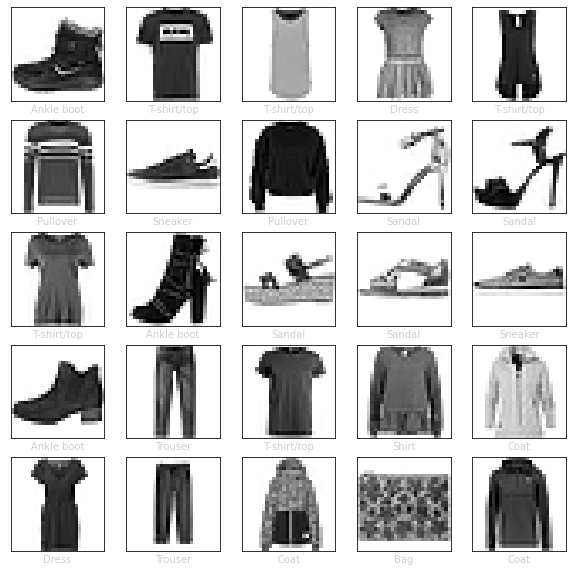

In [103]:
# 画像確認
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(X_train[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[y_train[i]],color = '#CFCFCF')
plt.show()

In [104]:
# 784次元(28×28)ベクトルに変換
X_train = X_train.reshape(X_train.shape[0], 784)
X_test = X_test.reshape(X_test.shape[0], 784)

In [105]:
# データの正規化
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

In [106]:
# 学習用にラベルデータをone-hot変換
y_train = to_categorical(y_train, num_classes = len(class_names))
y_test = to_categorical(y_test, num_classes = len(class_names))

In [107]:
# EarlyStopping
early_stopping = EarlyStopping(
    monitor='loss',
    patience=10,
    verbose=1
)

# 最適化関数（Ir：学習率）
optimizer = adam_v2.Adam(lr=0.001)

model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(256, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.2),
  tf.keras.layers.Dense(128, activation=tf.nn.relu),
  tf.keras.layers.Dropout(0.5),
  tf.keras.layers.Dense(len(class_names), activation=tf.nn.softmax)
])

model.compile(optimizer=optimizer,
              loss='categorical_crossentropy',
              metrics=['accuracy'])

hist = model.fit(
  X_train, 
  y_train, 
  epochs=50,
  validation_split=0.2,
  callbacks=[early_stopping])

Epoch 1/50


c:\Users\konno\AppData\Local\Programs\Python\Python37\lib\site-packages\keras\optimizer_v2\adam.py:105: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


1500/1500 [==============================] - 2s 1ms/step - loss: 0.6166 - accuracy: 0.7803 - val_loss: 0.4221 - val_accuracy: 0.8471
Epoch 2/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4435 - accuracy: 0.8408 - val_loss: 0.4223 - val_accuracy: 0.8227
Epoch 3/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.4048 - accuracy: 0.8548 - val_loss: 0.3736 - val_accuracy: 0.8676
Epoch 4/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3814 - accuracy: 0.8634 - val_loss: 0.3686 - val_accuracy: 0.8666
Epoch 5/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3693 - accuracy: 0.8679 - val_loss: 0.3455 - val_accuracy: 0.8769
Epoch 6/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3528 - accuracy: 0.8715 - val_loss: 0.3347 - val_accuracy: 0.8802
Epoch 7/50
1500/1500 [==============================] - 2s 1ms/step - loss: 0.3424 - accuracy: 0.8750 - val_loss: 0.3344 - val_accuracy: 0.8775
Epo

In [108]:
model.summary()

Model: "sequential_7"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten_6 (Flatten)         (32, 784)                 0         
                                                                 
 dense_21 (Dense)            (32, 256)                 200960    
                                                                 
 dropout_14 (Dropout)        (32, 256)                 0         
                                                                 
 dense_22 (Dense)            (32, 128)                 32896     
                                                                 
 dropout_15 (Dropout)        (32, 128)                 0         
                                                                 
 dense_23 (Dense)            (32, 10)                  1290      
                                                                 
Total params: 235,146
Trainable params: 235,146
Non-tr

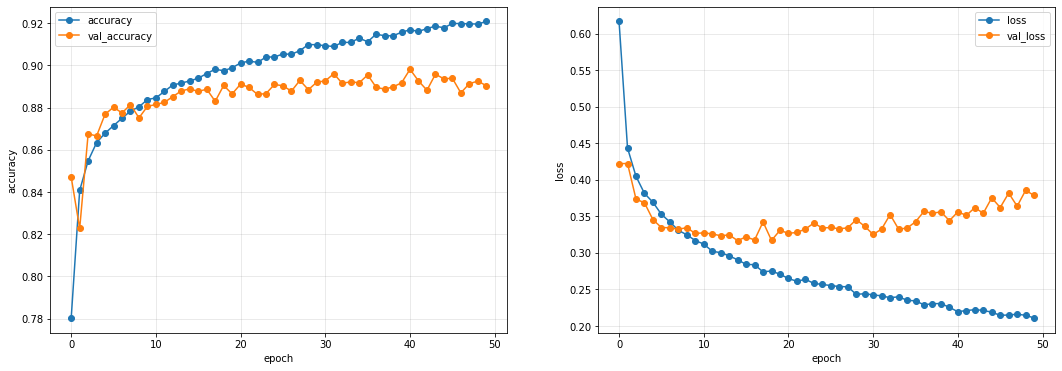

In [109]:
# 学習曲線を表示
plt.figure(figsize = (18,6))

# accuracy
plt.subplot(1, 2, 1)
plt.plot(hist.history["accuracy"], label = "accuracy", marker = "o")
plt.plot(hist.history["val_accuracy"], label = "val_accuracy", marker = "o")
#plt.xticks(np.arange())
#plt.yticks(np.arange())
plt.xlabel("epoch")
plt.ylabel("accuracy")
#plt.title("")
plt.legend(loc = "best")
plt.grid(color = 'gray', alpha=0.2)

# loss
plt.subplot(1, 2, 2)
plt.plot(hist.history["loss"], label = "loss", marker = "o")
plt.plot(hist.history["val_loss"], label = "val_loss", marker = "o")
#plt.xticks(np.arange())
#plt.yticks(np.arange())
plt.xlabel("epoch")
plt.ylabel("loss")
#plt.title("")
plt.legend(loc="best")
plt.grid(color = 'gray', alpha = 0.2)

plt.show()

lossは損失
accuracyは精度
val_lossはバリデーションデータに対する損失
val_accuracyはバリデーションデータに対する精度

■val_accuracy が accuracy よりも精度が低い場合
過学習の傾向にある

■val_accuracy、accuracy ともに精度が低い場合
未学習の傾向にある

■val_accuracy が accuracy よりも精度が高い場合
- validationデータ が少ない
- 学習が足りていない可能性があるので、epoch数 を上げる
- 隠れ層のユニット数を増やす

■グラフが激しく振動している場合
- 学習率が高い
- そもそもデータ数が少ない

■学習始めの際、loss が val_loss よりも大きい理由
- Dropout や正則化は、学習の際、汎用性を保持しながら、重みを更新させることを主軸とした手法なので、検証や評価では使われない。
- 各epoch ごとの loss は trainデータの各batch の平均であり、最初と最後の batch の誤差は大きい。それに対して val_loss は各epoch の最後の状態のモデルを使って計算されるため、誤差が小さい。

In [110]:
# モデルの評価
score = model.evaluate(X_test, y_test, verbose=1)
print("予測との差: {0[0]}".format(score))
print("正答率: {0[1]}".format(score))

313/313 [==============================] - 0s 1ms/step - loss: 0.4099 - accuracy: 0.8874
予測との差: 0.4099377393722534
正答率: 0.8873999714851379


In [111]:
# 投入データ作成
test_index = 1
input_data = np.zeros((1, 784))
input_data[0] = X_test[test_index]
print(input_data.shape)
print(y_test[test_index])

(1, 784)
[0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]


各要素の一致率： [1.8629280e-09 1.7893989e-16 9.9983764e-01 4.1750087e-16 1.3317171e-04
 5.7741565e-24 2.9162549e-05 1.8432109e-30 2.3826639e-15 1.0077387e-27]
予想： 2

0 : T-shirt/top
1 : Trouser
2 : Pullover
3 : Dress
4 : Coat
5 : Sandal
6 : Shirt
7 : Sneaker
8 : Bag
9 : Ankle boot

投入データの画像


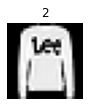

In [112]:
# 投入データの判定
predictions = model.predict(input_data)

print('各要素の一致率：',predictions[0])
print('予想：',predictions[0].argmax())
print()

for label,class_name in zip(labels,class_names):
    print(label,":",class_name)

# 投入データ表示
print('\n投入データの画像')
plt.figure(figsize=(16,6))
plt.subplot(3, 10, 1)
# xy軸消去
plt.axis("off")
plt.title(y_test[test_index].argmax())
# 28×28の２次元配列に変換
plt.imshow(X_test[test_index].reshape(28,28), "gray")
plt.show()